/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


[[2.52377611e+03            nan]
 [           nan 8.40307355e-03]]
[1.06417095e+04 5.37754191e-01]
102.95630140987001 12.626716210644434
0.73348483283569 0.006135096185428632


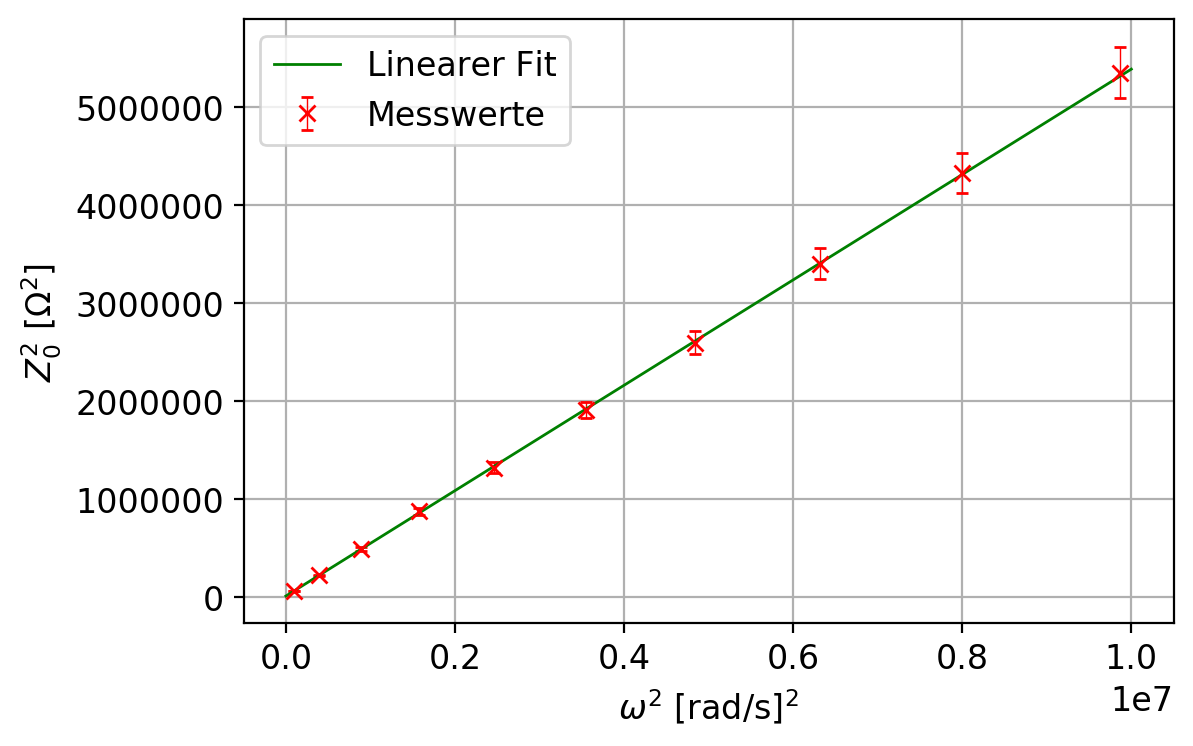

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
plt.rcParams.update({'font.size': 12})

##Messung ohne Kondensator
w = np.loadtxt("serie_ohneC.txt",usecols = 0)*2*np.pi ##Kreisfrequenz
U = np.loadtxt("serie_ohneC.txt",usecols = 1) ##Gesamtspannung über Messzweig
sig_U = U * 0.01 + 3 * 0.01
I = np.loadtxt("serie_ohneC.txt",usecols = 2)/1000 ##Gesamtstrom
sig_I = I * 0.01 + 3 * 0.01/1000

##Z quadrat
Z2 = (U/I)**2
sig_Z2 = np.sqrt(sig_U**2 * (2*U/I**2)**2+sig_I**2*(2*U**2/I**3)**2)

#linregress
def y(m,b,x):
    return m*x+b
popt, pcov = scipy.optimize.curve_fit(y,w**2,Z2,sigma = sig_Z2, p0=[0,0], absolute_sigma=True)

x = np.linspace(0,1e7,1000)





plt.figure(dpi = 200)
plt.tight_layout()
plt.xlabel("$\omega^2$ [rad/s]$^2$")
plt.ylabel("$Z_0^2$ [$\Omega^2$]")
plt.errorbar(w**2,Z2,sig_Z2,fmt = 'x',color = 'r',ecolor ='r',linewidth = 0.5,capsize = 2, label = "Messwerte")
plt.plot(x,popt[1]*x+popt[0],linewidth=1,color = "g",label = "Linearer Fit")
plt.grid()
plt.legend(loc="upper left")
plt.savefig("ausw1.png")


print(np.sqrt(pcov))
print(popt)

#Parameter gerundet
m = 538e-3
sig_m = 9e-3
c = 10600
sig_c = 2600

##Widerstand R
R = np.sqrt(c)
sig_R = sig_c/(2*np.sqrt(c))
##Induktivität L
L = np.sqrt(m)
sig_L = sig_m/(2*np.sqrt(m))

print(R,sig_R)
print(L,sig_L)

[1.06415772e+02 7.38039954e-01 9.95756165e-07]
[[9.88656505e-01            nan 4.31959138e-05]
 [           nan 4.95305074e-03            nan]
 [4.31959138e-05            nan 6.98167616e-09]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


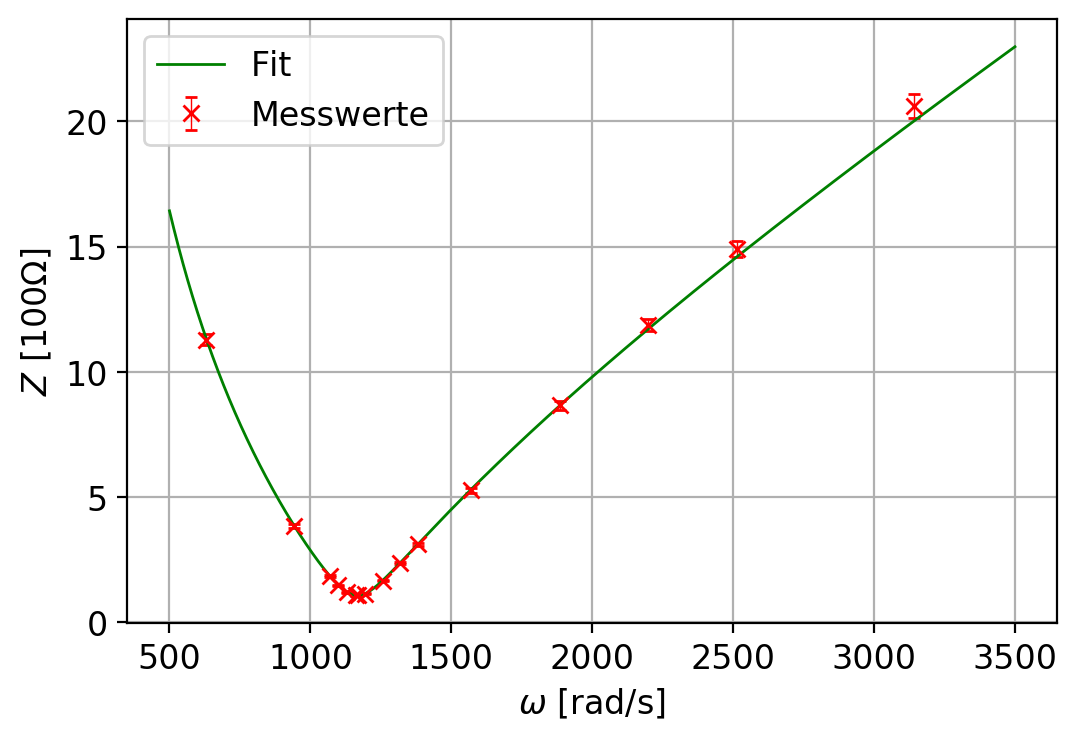

In [2]:
##Messung mit Kondensator
w = np.loadtxt("serie_mitC.txt",usecols = 0)*2*np.pi ##Kreisfrequenz
U = np.loadtxt("serie_mitC.txt",usecols = 1) ##Gesamtspannung über Messzweig
sig_U = U * 0.01 + 3 * 0.01
I = np.loadtxt("serie_mitC.txt",usecols = 2)/1000 ##Gesamtstrom
sig_I = I * 0.01 + 3 * 0.01/1000

Z = U/I
sig_Z = np.sqrt(sig_U**2*(1/I)**2+sig_I**2*(U/I**2)**2)

#fit
def z(w,R,L,C):
    return np.sqrt(R**2+(w*L-1/(w*C))**2)
popt, pcov = scipy.optimize.curve_fit(z,w,Z,sigma = sig_Z, p0=[0.5,0.5,0.5], absolute_sigma=True)


x = np.linspace(500,3500,2000)

plt.figure(dpi = 200)
plt.tight_layout()
plt.xlabel("$\omega$ [rad/s]")
plt.ylabel("$Z$ [100$\Omega$]")
plt.errorbar(w,Z/100,sig_Z/100,fmt = 'x',color = 'r',ecolor ='r',linewidth = 0.5,capsize = 2, label = "Messwerte")
plt.plot(x,z(x,popt[0],popt[1],popt[2])/100,linewidth=1,color = "g",label = "Fit")
plt.grid()
plt.legend(loc="upper left")
plt.savefig("ausw2.png")


print(popt)
print(np.sqrt(pcov))


[0.12858979 0.00088548 0.00082823]
[[-6.51200389e+08 -4.48423411e+06  4.19430400e+06]
 [-4.48423411e+06 -3.08789060e+04  2.88824168e+04]
 [ 4.19430400e+06  2.88824168e+04 -2.70150116e+04]]


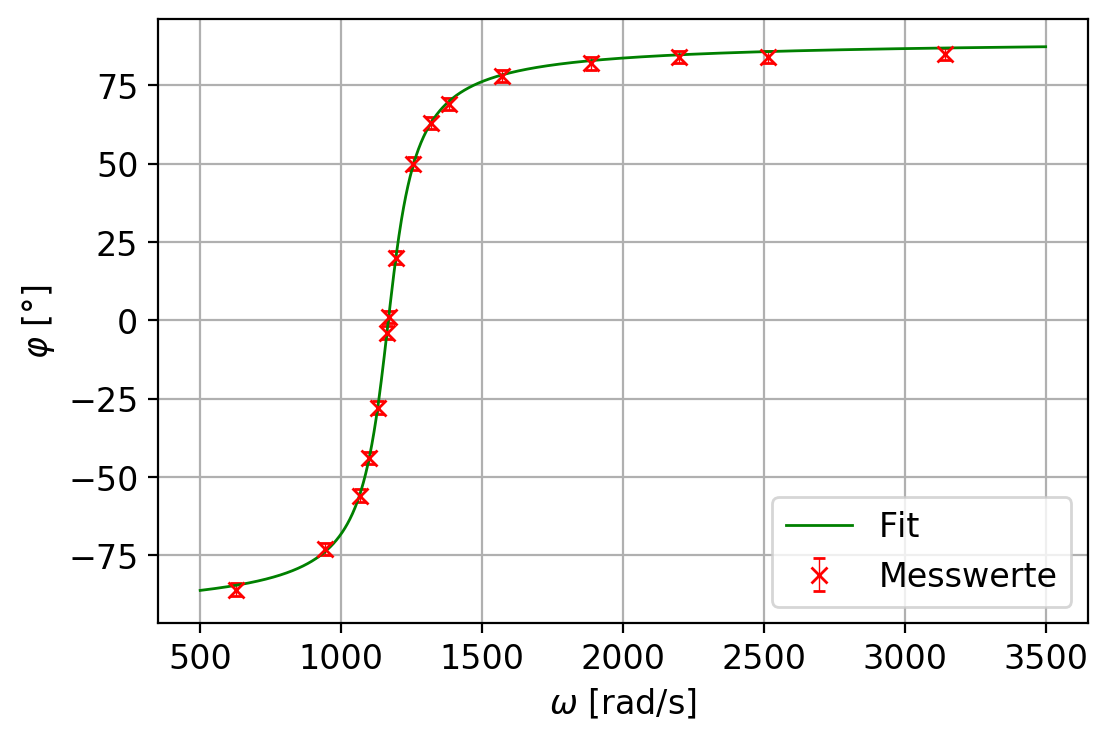

In [33]:
import math

##Phasenverschiebung 
phi = np.loadtxt("serie_mitC.txt",usecols = 3)
sig_phi = 2

sig_phi1 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])




##fitititit
def phase(w,R,L,C):
    return np.arctan((w*L-1/(w*C))/R)


popt, pcov = scipy.optimize.curve_fit(phase,w,np.radians(phi),sigma = np.radians(sig_phi1), p0=[0.001,0.001,0.001], absolute_sigma=True)



plt.figure(dpi = 200)
plt.xlabel("$\omega$ [rad/s]")
plt.ylabel(r"$\varphi$ [°]")
plt.errorbar(w,phi,sig_phi,fmt = 'x',color = 'r',ecolor ='r',linewidth = 0.5,capsize = 2, label = "Messwerte")
plt.plot(x,np.degrees(phase(x,popt[0],popt[1],popt[2])),linewidth=1,color = "g",label = "Fit")
plt.grid()
plt.legend(loc="lower right")
plt.savefig("ausw3.png")

print(popt)
print(pcov)